# Taco Burrito EDA (updated locations)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
pd.options.display.max_colwidth = 100

In [2]:
pd.options.display.max_rows = 500

In [3]:
data = pd.read_csv('datathon_gs_restaurant_burrito.csv')
data.head().transpose()

,0,1,2,3,4
id,AVwc--1EByjofQCxkSzo,AVwc-0E6ByjofQCxkRB-,AVwc-0FjIN2L1WUfq-Pk,AVwc-2Nk_7pvs4fz1AxU,AVwc-2STkufWRAb51D-z
address,6701 E,5631 Cottle Rd,223 W Grand Ave,1300 280 Byp,900 Broadway Rt 110
categories,Fast Food Restaurant,"Breakfast Spot,American Restaurant,Diner",Mexican Restaurant,"Fast Food Restaurant,Restaurants",Fast Food Restaurant
city,Kansas City,San Jose,Bensenville,Phenix City,Amityville
country,US,US,US,US,US
cuisines,Fast Food Restaurants,NaN,NaN,Traditional American,NaN
dateAdded,2016-06-13T15:25:09Z,2015-09-13T04:19:10Z,2016-03-28T05:50:48Z,2016-04-03T00:59:54Z,2016-09-10T16:12:59Z
dateUpdated,2016-10-04T05:14:22Z,2017-07-01T16:23:26Z,2016-05-03T09:11:28Z,2016-08-04T15:44:30Z,2016-09-15T16:44:04Z
keys,us/mo/kansascity/6701e/-1161002137,us/ca/sanjose/5631cottlerd/1836929257,us/il/bensenville/223wgrandave/1976540727,us/al/phenixcity/1300280byp/696490760,us/northamityville/amityville/900broadwayrt110/-1161002137
latitude,39.1298,37.2511,NaN,32.472,NaN


In [4]:
shop_loc = data[['id', 'name', 'real_state', 'city', 'address', 'postalCode', 'real_latitude', 'real_longitude']]
shop_loc.head().transpose()

,0,1,2,3,4
id,AVwc--1EByjofQCxkSzo,AVwc-0E6ByjofQCxkRB-,AVwc-0FjIN2L1WUfq-Pk,AVwc-2Nk_7pvs4fz1AxU,AVwc-2STkufWRAb51D-z
name,Mcdonald's,Bill's Cafe,La Quebrada De Acapulco,Hardee's,Mcdonald's
real_state,MO,CA,IL,AL,NY
city,Kansas City,San Jose,Bensenville,Phenix City,Amityville
address,6701 E,5631 Cottle Rd,223 W Grand Ave,1300 280 Byp,900 Broadway Rt 110
postalCode,64120,95123,60106,36867,11701
real_latitude,39.1288,37.2462,41.9543,32.4873,40.6855
real_longitude,-94.5285,-121.835,-87.9463,-85.0164,-73.4146


In [5]:
stat_pct = (shop_loc.groupby('real_state')['id'].count() / shop_loc.shape[0] * 100).reset_index()
pd.concat([stat_pct.sort_values(by='id', ascending=False).head(5),
 stat_pct.sort_values(by='id', ascending=False).tail(15)])

,real_state,id
4,CA,27.957700
44,TX,7.013292
14,IL,4.420944
9,FL,4.391569
34,NY,4.369538
30,NH,0.455313
25,MS,0.455313
11,HI,0.337813
40,RI,0.330469
21,ME,0.323126


In [6]:
stat_cnt = shop_loc.groupby('real_state')['id'].count().reset_index()
pd.concat([stat_cnt.sort_values(by='id', ascending=False).head(5),
 stat_cnt.sort_values(by='id', ascending=False).tail(15)])

,real_state,id
4,CA,3807
44,TX,955
14,IL,602
9,FL,598
34,NY,595
30,NH,62
25,MS,62
11,HI,46
40,RI,45
21,ME,44


In [7]:
state_counts = shop_loc['real_state'].value_counts().reset_index()
state_counts.columns = ['STATE_ABBR', 'cnt_shop']
state_counts['cnt_shop'].sum()

13617

In [11]:
shapefile = os.path.expanduser('~/Documents/Client/Utils/states/states.shp')

colors = 7
cmap = 'Oranges'
title = 'How many Burrito Restaurants in each state across the US'
imgfile = 'restaurant_count_burrito.png'

gdf = gpd.read_file(shapefile)[['STATE_ABBR', 'geometry']]

merged = gdf.merge(state_counts)
# remove CA
# filt = (merged['STATE_ABBR'] != 'HI') & (merged['STATE_ABBR'] != 'AK')
# merged_48 = merged[filt]
# merged_48.head()

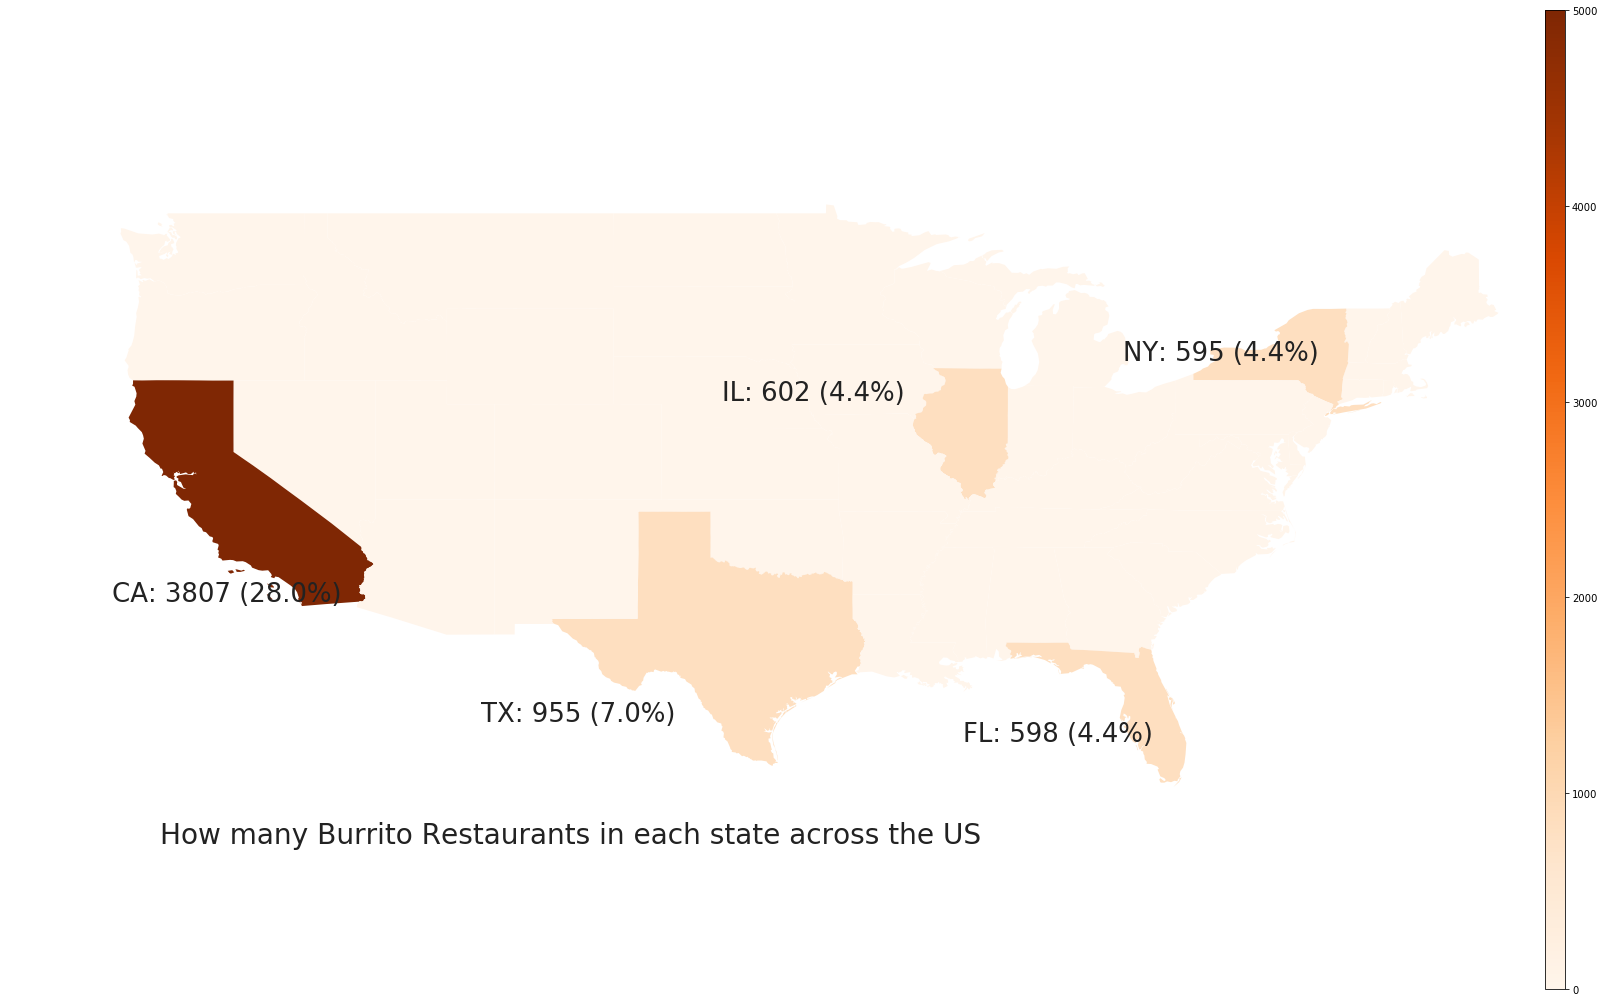

In [12]:
fig, ax = plt.subplots(1, figsize=(27, 18))
merged.plot(
    column='cnt_shop', cmap=cmap, scheme='equal_interval', ax=ax, k=colors, legend=False
)
ax.set_xlim([-125, -65])
ax.set_ylim([24, 50])
# for AK and HI
# ax.set_xlim([-160, -130])
# ax.set_ylim([20, 50])
ax.set_axis_off()

# ax.get_legend().set_bbox_to_anchor((.2, .4))
# ax.set_title('Physician Target Counts in the 50 US states', fontdict={'fontsize': '20', 'fontweight' : '2'})
ax.annotate(title, xy=(.1, .18),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=28, color='#222222')
ax.annotate('CA: 3807 (28.0%)', xy=(.07, .42),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('TX: 955 (7.0%)', xy=(.3, .3),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('FL: 598 (4.4%)', xy=(.6, .28),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('NY: 595 (4.4%)', xy=(.7, .66),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('IL: 602 (4.4%)', xy=(.45, .62),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')

# Create colorbar as a legend
vmin, vmax = 0, 5000
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, orientation='vertical', fraction=.05, pad=0, aspect=50)

# plt.show()
plt.savefig(imgfile)